# Predicting the Probablity of Airbnb Prices in NYC 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import os

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share";
from mpl_toolkits.basemap import Basemap
from folium.plugins import HeatMap
import plotly.graph_objs as go

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeClassifier, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
classification_report, accuracy_score, precision_score, plot_confusion_matrix

### Loading in the Data

In [52]:
ls

Final_notebook.ipynb     Working_Notebook2.ipynb  map1.html
README.md                Working_notebook.ipynb   map2.html


Got this file from the Website Inside Airbnb 

In [53]:
df = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/listings (1).csv')

In [54]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210901220703,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20210901220703,2021-09-02,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,https://www.airbnb.com/rooms/5121,20210901220703,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,1,0,1,0,0.54
3,5136,https://www.airbnb.com/rooms/5136,20210901220703,2021-09-02,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20210901220703,2021-09-02,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.40,4.86,4.36,NaN,f,1,0,1,0,3.64


In [55]:
df.shape

(36923, 74)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [57]:
df.duplicated().sum()

0

In [58]:
pd.options.display.max_rows = 4000

In [59]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               13
description                                      1213
neighborhood_overview                           14413
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                         111
host_since                                        111
host_location                                     209
host_about                                      15287
host_response_time                              15743
host_response_rate                              15743
host_acceptance_rate                            15102
host_is_superhost                                 111
host_thumbnail_url          

In [60]:
df['review_scores_rating'].describe()

count    27627.000000
mean         4.578315
std          0.854467
min          0.000000
25%          4.570000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [61]:
df['review_scores_accuracy'].describe()

count    26998.000000
mean         4.747624
std          0.493899
min          0.000000
25%          4.710000
50%          4.900000
75%          5.000000
max          5.000000
Name: review_scores_accuracy, dtype: float64

In [62]:
df['review_scores_location'].describe()

count    26987.000000
mean         4.753515
std          0.415131
min          0.000000
25%          4.670000
50%          4.880000
75%          5.000000
max          5.000000
Name: review_scores_location, dtype: float64

In [63]:
#this needs to be filled with the medium
df['host_listings_count'].describe()

count    36812.000000
mean        32.769423
std        213.664601
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5069.000000
Name: host_listings_count, dtype: float64

In [64]:
#fill with median
df['beds'].describe()

count    36312.000000
mean         1.531422
std          1.123261
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: beds, dtype: float64

<AxesSubplot:>

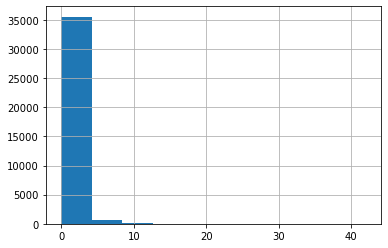

In [65]:
df['beds'].hist()

In [66]:
df['beds'].value_counts()

1.0     22421
2.0      7685
3.0      2728
0.0      1500
4.0      1196
5.0       382
6.0       202
7.0        81
8.0        50
9.0        29
10.0       12
12.0        8
11.0        6
13.0        4
16.0        2
15.0        2
42.0        1
21.0        1
24.0        1
17.0        1
Name: beds, dtype: int64

In [67]:
df = df[df['beds']< 21]

In [68]:
#fill with median
df['accommodates'].describe()

count    36309.000000
mean         2.809276
std          1.858630
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [69]:
#fill with median
df['bedrooms'].describe()

count    32466.000000
mean         1.330099
std          0.712852
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bedrooms, dtype: float64

In [70]:
df['review_scores_value'].describe()

count    26730.000000
mean         4.653135
std          0.509534
min          0.000000
25%          4.560000
50%          4.790000
75%          5.000000
max          5.000000
Name: review_scores_value, dtype: float64

### Start cleaning data

In [71]:
df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

0         19.0
1         86.0
2          NaN
3         33.0
4        100.0
         ...  
36918     96.0
36919     25.0
36920     78.0
36921     25.0
36922    100.0
Name: host_acceptance_rate, Length: 36309, dtype: float64

Creating new columns

In [72]:
# Created a column for how many years the airbnb has been a host
df['host_since'] = pd.to_datetime(df['host_since'])
df['year'] = df['host_since'].apply(lambda date: date.year)

df['years_been_host'] = max(df['year']) - df['year']

In [73]:
#Created a column of how many verifications each host has
df['number_of_verifications'] = df.host_verifications.str.count(',')+1

In [74]:
#Created a column of how many amenities each host has
df['number_of_amenities'] = df.amenities.str.count(',')+1

Changing the bathroom and price text to get only the number and turn to a float

In [75]:
df['bathrooms_text'] = df.bathrooms_text.str.extract('(\d+)').astype(float)

In [76]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

Filling missing data with median 

In [77]:
median = df.filter(['host_listings_count','beds', 'bedrooms'
                    ,'accommodates','years_been_host','bathrooms_text']).median()



In [78]:
cols = ['host_listings_count','beds', 'bedrooms','accommodates','years_been_host','bathrooms_text']                          
df[cols]=df[cols].fillna(median)

Filling missing data with the mean

In [79]:
mean = df.filter(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value']).mean()

In [80]:
cols2 = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location','review_scores_value']                          
df[cols2]=df[cols2].fillna(mean)

In [82]:
#labels = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified']

In [83]:
df = df.fillna(df.mode().iloc[0])

### Creating graphs

In [84]:
# set the filepath and load in a shapefile
fp = '/Users/raylinsoriano/Documents/Flatiron/capstone/data/Borough Boundaries.zip'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.187194e+09,463868.937681,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,1.0,Manhattan,6.365759e+08,359804.890798,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,5.0,Staten Island,1.623636e+09,325929.794027,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,3.0,Brooklyn,1.934174e+09,728195.197649,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.040205e+09,900270.512975,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


<AxesSubplot:>

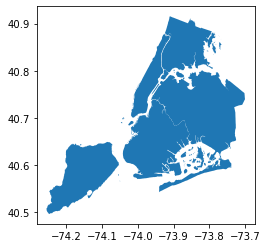

In [85]:
map_df.plot()

In [86]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('neighbourhood_group_cleansed').size())
#borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('neighbourhood_group_cleansed').price.median().values
borough_df['median_rating'] = df.groupby('neighbourhood_group_cleansed').review_scores_rating.median().values
# Joining the dataframes
borough_map_df = map_df.set_index('boro_name').join(borough_df)

borough_map_df.head()

,boro_code,shape_area,shape_leng,geometry,0,median_price,median_rating
boro_name,,,,,,,
Bronx,2.0,1.187194e+09,463868.937681,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",1004,75.0,4.71
Manhattan,1.0,6.365759e+08,359804.890798,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",15933,149.0,4.60
Staten Island,5.0,1.623636e+09,325929.794027,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",311,89.0,4.80
Brooklyn,3.0,1.934174e+09,728195.197649,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",14181,100.0,4.75
Queens,4.0,3.040205e+09,900270.512975,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",4880,75.0,4.68


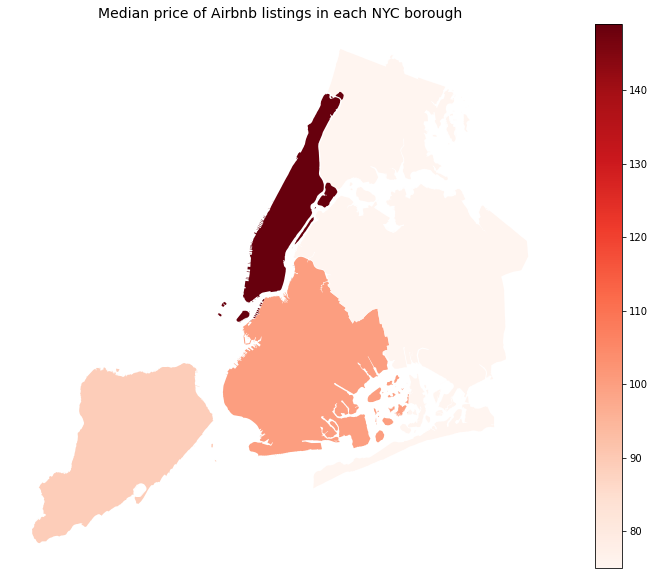

In [87]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 10))
borough_map_df.plot(column='median_price', cmap='Reds', ax=ax2)

ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each NYC borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


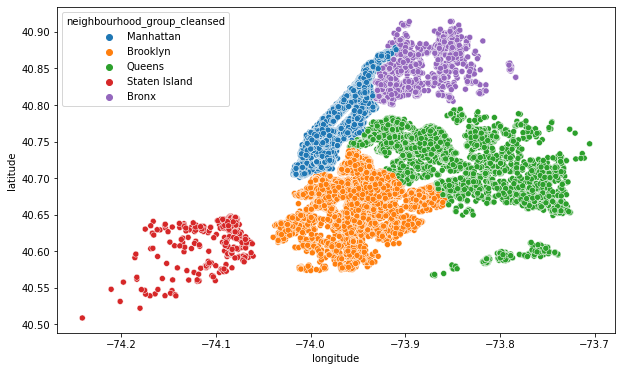

In [88]:
# Graph of the counts of listings in each listing in each borough
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group_cleansed)
plt.ioff();

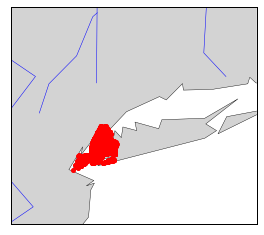

<Figure size 10800x10800 with 0 Axes>

In [89]:
# New York Central Park
# Longitude: -73.968285
# Latitude: 40.785091

m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=42,
            llcrnrlon=-75, urcrnrlon=-72, resolution='l', area_thresh=50, lat_0=40.78, lon_0=-73.96)

m.drawmapboundary()
m.drawcoastlines(color='black', linewidth=0.4)
m.drawrivers(color='blue')
m.fillcontinents(color='lightgray')

lons = df['longitude'].values
lats = df['latitude'].values
x,y = m(lons, lats)

m.plot(x, y, 'ro', markersize=4)

plt.figure(figsize=(150,150))
plt.show()

Heat map of listings by price

In [90]:
nyc_heat = folium.Map(location=[40.78,-73.96], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df[['latitude', 'longitude']].iterrows()]

hm =  HeatMap(heat_data).add_to(nyc_heat)

nyc_heat

Dropping columns not needed

In [92]:
df = df.drop(['host_url','listing_url', 'picture_url','host_thumbnail_url', 'host_picture_url','neighbourhood'
              ,'host_neighbourhood','property_type','bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights'
             ,'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'
             ,'calendar_updated','calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d'
             ,'first_review','last_review', 'review_scores_value','license','reviews_per_month', 'neighborhood_overview'
             ,'host_response_rate', 'host_acceptance_rate','host_about', 'host_location', 'scrape_id','last_scraped'
             ,'host_since','year', 'neighbourhood_cleansed', 'amenities','host_name', 'name', 'host_id', 'description'], axis=1)

In [93]:
df.isna().sum()

id                                              0
host_response_time                              0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


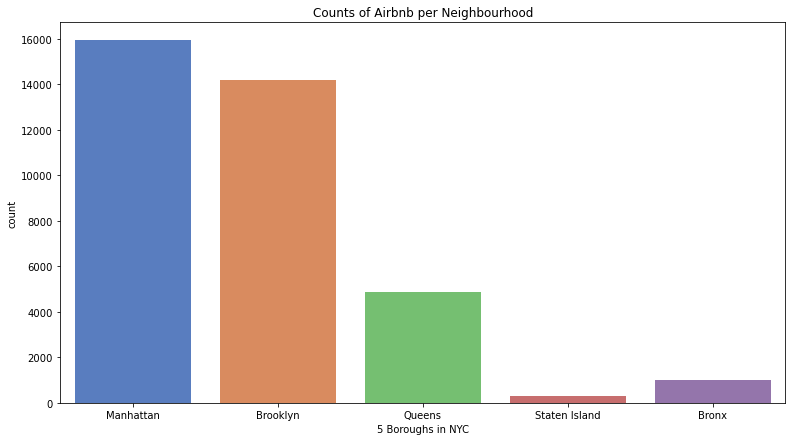

In [94]:
plt.figure(figsize=(13,7))
plt.title("Counts of Airbnb per Neighbourhood")
neighbourhood_group_cleansed_graph = sns.countplot(df.neighbourhood_group_cleansed, palette="muted")
neighbourhood_group_cleansed_graph.set_xlabel("5 Boroughs in NYC")
fig = plt.gcf()
plt.show()

### Target

Graph of the target

Text(0.5, 1.0, 'Target Class Frequency Count')

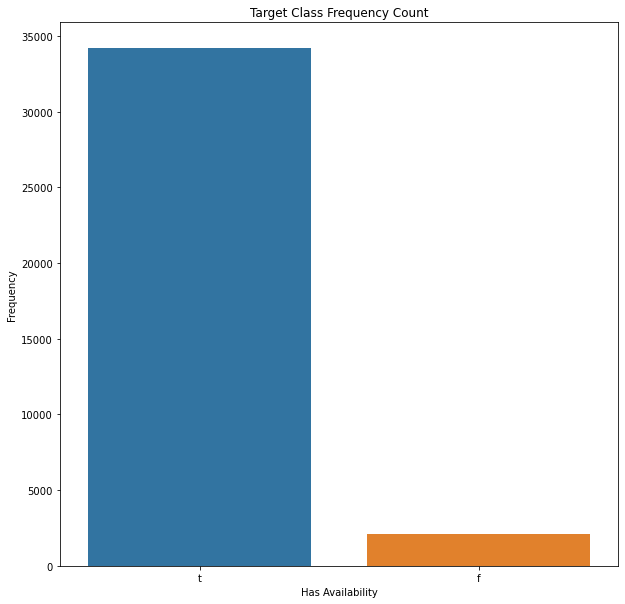

In [95]:
plt.figure(figsize = (10,10))
target_graph = sns.countplot(x=df['has_availability'])
target_graph.set_xlabel("Has Availability")
target_graph.set_ylabel("Frequency")
target_graph.set_title("Target Class Frequency Count")

Looking at this graph you see that is high imbalanced 

In [96]:
df['has_availability'].value_counts()

t    34194
f     2115
Name: has_availability, dtype: int64

In [143]:
df['has_availability'].value_counts(normalize=True)

0    0.94175
1    0.05825
Name: has_availability, dtype: float64

Having availability explains for 95% while for no availability explains for 5%

In [97]:
df['has_availability'] = df['has_availability'].map({'t': 0,
                                     'f': 1,})

## Modeling

### Train/Test Split

In [98]:
X= df.drop(["has_availability",'id', 'latitude','longitude'],axis=1)
y= df["has_availability"]

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y)

#### One Hot Encoding

Changing all the categorical data to numeric by one hot encoding

In [99]:
#Categorical variables to use
categorical_vars = ["host_response_time","host_has_profile_pic","host_identity_verified","host_is_superhost"
            ,"neighbourhood_group_cleansed","room_type","instant_bookable"]


In [100]:
train = X_train[categorical_vars]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
enc = ohe.fit(train)
train_dummies_trans = enc.transform(train)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categorical_vars)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names,index = X_train.index)

In [101]:
test = X_test[categorical_vars]
    
# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
enc = ohe.fit(test)
test_dummies_trans = enc.transform(test)

# Dummies values in matrix form
test_data = test_dummies_trans.todense()

# New dummy column names
names1 = ohe.get_feature_names(categorical_vars)

# Make them into Dataframe
test_dummies_trans_df = pd.DataFrame(test_data, columns=names1,index = X_test.index)

In [102]:
numerical = (X_train.select_dtypes(exclude='object'))
numerical = pd.DataFrame(numerical, index = X_train.index)
df_train = train_dummies_trans_df.merge(numerical, left_index = True , right_index=True)

In [103]:
numerical1 = (X_test.select_dtypes(exclude='object'))
numerical1 = pd.DataFrame(numerical1, index = X_test.index)
df_test = test_dummies_trans_df.merge(numerical1, left_index = True , right_index=True)

In [104]:
df_train.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,host_is_superhost_f,host_is_superhost_t,...,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_been_host,number_of_verifications,number_of_amenities
19525,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.819743,4.81679,4.754405,297,297,0,0,5.0,9,30
15115,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.670000,3.67000,4.670000,1,1,0,0,9.0,6,24
11682,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.940000,4.96000,4.880000,1,1,0,0,7.0,5,16
1759,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.910000,4.73000,5.000000,1,0,1,0,11.0,6,21
21127,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.000000,5.00000,5.000000,1,1,0,0,3.0,4,10


In [105]:
df_test.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,host_is_superhost_f,host_is_superhost_t,...,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_been_host,number_of_verifications,number_of_amenities
1007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.86,5.00,3.86,1,0,1,0,9.0,2,10
14872,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.97,4.97,4.75,1,1,0,0,4.0,8,31
14742,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.00,5.00,4.67,1,1,0,0,9.0,6,19
8662,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.00,5.00,4.50,1,1,0,0,6.0,3,21
19562,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,5.00,5.00,5.00,1,1,0,0,10.0,6,34


#### Functions that validates scores

In [159]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and class target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision', 'recall', 'f1']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring, cv=5)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Precision:', results['train_precision'].mean())
    print('Cross_Val Precision:', results['test_precision'].mean())
    print('##############')
    print('Training  Recall:', results['train_recall'].mean())
    print('Cross_Val Recall:', results['test_recall'].mean())
    print('##############')
    print('Training  F1:', results['train_f1'].mean())
    print('Cross_Val  F1:', results['test_f1'].mean())

In [ ]:
def print_cv_scores_test(pipe, X, y):
    '''
    Runs cross_validate on given feature and class target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision', 'recall', 'f1']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring, cv=5)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Precision:', results['train_precision'].mean())
    print('Cross_Val Precision:', results['test_precision'].mean())
    print('##############')
    print('Training  Recall:', results['train_recall'].mean())
    print('Cross_Val Recall:', results['test_recall'].mean())
    print('##############')
    print('Training  F1:', results['train_f1'].mean())
    print('Cross_Val  F1:', results['test_f1'].mean())

## First Simple Model (baseline)

I am going to use a naive bayes as my first model to see if it works

For my metric I will be looking as Precision to see how well my model is correctly predicting a listings

In [107]:
fsm_pip = Pipeline([('nb', MultinomialNB())
                    ])

In [108]:
fsm_pip.fit(df_train, y_train)

Pipeline(steps=[('nb', MultinomialNB())])

In [109]:
print_cv_scores(fsm_pip, df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.65277268 0.94170301 0.9415653  0.9415653  0.9415653 ]
Training Accuracy 0.8838343151037613
##############
Training Precision: 0.19529962971359477
##############
Training  Recall: 0.19984177411857124
##############
Training  F1: 0.05132501749881844


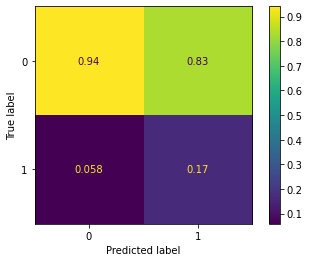

In [110]:
plot_confusion_matrix(fsm_pip, df_train, y_train,normalize = 'pred');

## Logisitc Regression Models

In [111]:
log_pipe = Pipeline([('lg', LogisticRegression(solver='liblinear',max_iter=100000000))
                    ])

In [112]:
log_pipe.fit(df_train,  y_train)

Pipeline(steps=[('lg',
                 LogisticRegression(max_iter=100000000, solver='liblinear'))])

In [113]:
print_cv_scores(log_pipe, df_train, y_train)


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.94271025 0.94184072 0.94197843 0.94142759 0.94170301]
Training Accuracy 0.9419319964218136
##############
Training Precision: 0.6165715035030536
##############
Training  Recall: 0.012457087599714622
##############
Training  F1: 0.023807637049946963


For this Logisitc model precision did not preform too well but it did much better than the baseline

Below I created a gridsearch to see which parameters will give me the best score for a model

In [65]:
grid = {'lg__class_weight': [None, 'balanced'], 
         'lg__tol': [0.0001, 0.01, 0.1],
         'lg__C' : [0.0001,0.001,0.01],
         'lg__penalty': ['l1', 'l2']
        }

In [ ]:
gridsearch = GridSearchCV(log_pipe, grid, return_train_score=True, scoring='precision',verbose=2)

gridsearch.fit(df_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.7s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.6s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.3s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.6s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s


In [ ]:
print('gridsearch best parameters: {}'.format(gridsearch.best_params_))
print('gridsearch best score: {}'.format(gridsearch.best_score_))

In [114]:
log_pipe2 = Pipeline([('lg', LogisticRegression(C=0.01, solver='liblinear',max_iter=100000000))
                    ])

In [115]:
log_pipe2.fit(df_train,  y_train)

Pipeline(steps=[('lg',
                 LogisticRegression(C=0.01, max_iter=100000000,
                                    solver='liblinear'))])

In [116]:
print_cv_scores(log_pipe2, df_train, y_train)

[0.942343   0.9415653  0.94193252 0.94179481 0.94174891]
Training Accuracy 0.9418769092770625
##############
Training Precision: 0.5588023088023089
##############
Training  Recall: 0.010405992945089529
##############
Training  F1: 0.02024605002893094


#### Logisitic with SMOTE

In [117]:
log_smote_pipe = imbpipe([('smote', SMOTE()),
                        ('lg', LogisticRegression(C=0.01,solver='liblinear',max_iter=100000000))
                    ])

In [118]:
log_smote_pipe.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('lg',
                 LogisticRegression(C=0.01, max_iter=100000000,
                                    solver='liblinear'))])

In [119]:
print_cv_scores(log_smote_pipe, df_train, y_train)

[0.82588138 0.65063117 0.6438375  0.64989672 0.70263943]
Training Accuracy 0.694577240132025
##############
Training Precision: 0.16392633264999498
##############
Training  Recall: 0.9653124867937943
##############
Training  F1: 0.2778776283127011


## Random Forest Models

Next I will be running models using Random Forest

In [120]:
rf_pipe = Pipeline([('rf', RandomForestClassifier())
                    ])

In [121]:
rf_pipe.fit(df_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [122]:
print_cv_scores(rf_pipe, df_train, y_train)

[0.99995409 0.99990819 0.9999541  0.99990819 0.99981639]
Training Accuracy 0.9999081932898302
##############
Training Precision: 0.9993693335647021
##############
Training  Recall: 0.9990543735224587
##############
Training  F1: 0.9992116672256259


Precision and accuracy did very well but that is most likely due to overfit

Now I will run a grid search for my random forest to see which parameters give me the best score

In [123]:
grid2 = {"rf__class_weight": [None, 'balanced'],
        "rf__n_estimators": [10,25 , 50], 
        "rf__max_depth" : [10, 15, 20], 
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch2 = GridSearchCV(rf_pipe, grid2, return_train_score=True, scoring='precision',verbose=2)

In [124]:
gridsearch2.fit(df_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=

[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimato

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf

GridSearchCV(estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': [None, 'balanced'],
                         'rf__max_depth': [10, 15, 20],
                         'rf__min_samples_leaf': [1, 2, 3],
                         'rf__n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='precision', verbose=2)

In [125]:
print('gridsearch best parameters: {}'.format(gridsearch2.best_params_))
print('gridsearch best score: {}'.format(gridsearch2.best_score_))

gridsearch best parameters: {'rf__class_weight': None, 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 25}
gridsearch best score: 0.6400992017360304


Now I will try with the parameters above to see how well the model will do.

In [145]:
rf_pipe2 = Pipeline([('rf', RandomForestClassifier(n_estimators=25, max_depth=10, min_samples_leaf=2))
                    ])

In [146]:
rf_pipe2.fit(df_train,y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=25))])

In [147]:
print_cv_scores(rf_pipe2, df_train, y_train)

[0.94266434 0.94340142 0.94335552 0.94422768 0.94358504]
Training Accuracy 0.9434467997644325
##############
Training Precision: 0.848062616731095
##############
Training  Recall: 0.03798527368230033
##############
Training  F1: 0.07206120199436525


This model did great with an accuracy score of 94% and precision of 84%. This a big improvement from the logistic models.

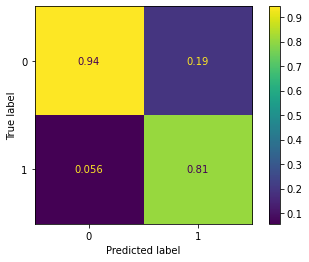

In [148]:
plot_confusion_matrix(rf_pipe2, df_train, y_train,normalize = 'pred');

Looking at the confusion matrix, it looks like that the model struggles a bit at 19% for not available to book when it it actually is.

#### Random Forest with SMOTE

I will now try smote to see if it will preform better and attack the imbalanced issue.

In [149]:
rf_pipe_sm = imbpipe([('smote', SMOTE()),
                    ('rf', RandomForestClassifier(n_estimators=25, max_depth=10, min_samples_leaf=2))
                    ])

rf_pipe_sm.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=25))])

In [150]:

print_cv_scores(rf_pipe_sm, df_train, y_train)

[0.88032501 0.88698646 0.87964196 0.88280927 0.88372734]
Training Accuracy 0.8826980061970089
##############
Training Precision: 0.3106913408088353
##############
Training  Recall: 0.8314934136767815
##############
Training  F1: 0.4523270346947689


Looking at the scores it seems that the model preforms much worse when using smote.

## XGBoost

For my final model I wilo be using XGBoost

In [132]:
xgb_pipe = Pipeline([('xgb', XGBClassifier(objective='binary:logistic',use_label_encoder=False))
                    ])

In [133]:
xgb_pipe.fit(df_train,y_train)


[16:51:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [134]:
print_cv_scores(xgb_pipe, df_train, y_train)


[16:52:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:12] WARNING: /Users/runner/miniforge3/cond

Looking at the accuracy and precision score it looks like the model preforms well but that could be due to overfitting so I am going to run a grid search to see which parameters will give me the best score.

In [135]:
grid3 = {"xgb__max_depth": [5, 6, 7],
        "xgb__min_child_weight": [1, 2 , 3], 
        "xgb__scale_pos_weight" : [1, 2, 3, 4], 
        "xgb__colsample_bytree" : [1, 2, 3, 4]
       
       
       }

gridsearch3 = GridSearchCV(xgb_pipe, grid3, return_train_score=True, scoring='precision',verbose=2)

In [136]:
gridsearch3.fit(df_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[16:52:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   3.3s
[16:52:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   2.7s
[16:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboos

[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   3.2s
[16:53:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   3.1s
[16:53:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   2.7s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.5s
[16:54:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   2.8s
[16:54:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   2.7s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   2.9s
[16:55:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   2.7s
[16:55:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   3.7s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   3.2s
[16:56:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   3.2s
[16:56:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   3.3s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   3.5s
[16:57:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   3.3s
[16:57:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   3.3s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   3.3s
[16:58:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   3.2s
[16:58:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   3.5s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.1s
[16:59:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   3.8s
[16:59:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   3.8s
[16

[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   3.9s
[17:01:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   3.8s
[17:01:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   3.8s
[17

[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=  26.2s
[17:04:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=  16.6s
[17:04:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=  44.9s
[17

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.2s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.2s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.2s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.2s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.2s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.85514854 0.68666998 0.59660531 0.53873607 0.84833347 0.67460175
 0.58506081 0.54159953 0.84146484 0.67198843 0.58858325 0.53707601
 0.90752174 0.76214146 0.67263251 0.61869831 0.89727361 0.74743664
 0.66679325 0.61062963 0.88628915 0.74112039 0.66303936 0.60458124
 0.94071241 0.82910088 0.74725698 0.70490726 0.92998404 0.81508189
 0.73866748 0.67561252 0.90886895 0.80134625 0.73102835 0.68080628
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan   

[17:07:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                      max_depth=6,
                                                      min_child_weight=1,
                                                      missin

In [137]:
print('gridsearch best parameters: {}'.format(gridsearch3.best_params_))
print('gridsearch best score: {}'.format(gridsearch3.best_score_))

gridsearch best parameters: {'xgb__colsample_bytree': 1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__scale_pos_weight': 1}
gridsearch best score: 0.5184594172932484


In [153]:
xgb_pipe2 = Pipeline([('xgb', XGBClassifier(colsample_bytree= 1, max_depth= 5, min_child_weight= 1, scale_pos_weight=1 
                                            ,evals_result={'binary':'logistic'}, use_label_encoder=False))
                    ])


xgb_pipe2.fit(df_train, y_train)

[18:16:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "cale_pos_weight", "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:16:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               cale_pos_weight=1, colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosi

In [154]:
print_cv_scores(xgb_pipe2, df_train, y_train)

[18:16:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "cale_pos_weight", "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:16:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "cale_pos_weight", "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings b

Looking at the accuracy and precision score XGBoost preformed a bit better than my Random Forest. So I will be using XGBoost for my final model.

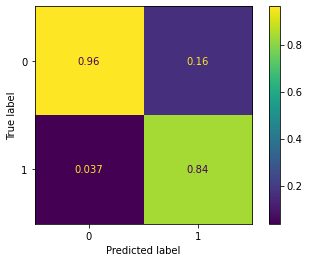

In [155]:
plot_confusion_matrix(xgb_pipe2, df_train, y_train, normalize = 'pred');

#### XGBoost with smote

In [174]:
xgb_sm_pipe = imbpipe([('smote', SMOTE()),
                        ('xgb', XGBClassifier(colsample_bytree= 1, max_depth= 5, min_child_weight= 1, scale_pos_weight=1
                                              ,evals_result={'binary':'logistic'}, label_encoder=False))
                    ])

xgb_sm_pipe.fit(df_train,y_train)


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('smote', SMOTE()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', label_encoder=False,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [175]:
print_cv_scores(xgb_sm_pipe,df_train,y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:43:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.95877708 0.95946752 0.95749369 0.95822814 0.95666743]
Training Accuracy 0.9581267732576002
##############
[0.94143565 0.93628351 0.93609989 0.93830334 0.93903783]
Cross_Val Accuracy 0.9382320442286943
##############
Training Precision: 0.6956639880866227
Cross_Val

Accuracy and precision preformed worse using SMOTE.

## Final Model

For my final model I will be using th XGBoost pipline that had an accuracy score of 94% and precision score of 86% amd try it on my test set.

In [184]:
xgb_pipe2.score(df_test, y_test)

0.9430491297642652

In [185]:
y_pred = xgb_sm_pipe.predict(df_test)

In [186]:
precision_score(y_test, y_pred)

0.4565826330532213

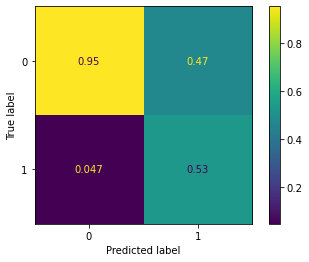

In [187]:
plot_confusion_matrix(xgb_pipe2, df_test, y_test, normalize = 'pred');